# Exemplo de Regressão Linear

O foco é avaliar o limite do empréstimo para alguém que possui um salário X

## Pegando os dados

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [2]:
data = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')
data

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


## Análise Exploratória dos Dados - Parte 1

Observando o conjunto de dados

In [3]:
data.head() # mostra os 5 primeiros registros da base da dados

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [4]:
data.tail() # mostra os 5 ultimos registros da base da dados

,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [5]:
data.columns # mostra as colunas da base de dados

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [6]:
data.info() # mostra as informações da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
data.describe() # tabela estatística da base de dados

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [8]:
# convertendo as colunas em formato de Array -> ganhar performance
Eixo_x = data.iloc[:, 0].values # [quantidade de linhas, quantidade de colunas] : = todas as linhas, 0 = primeira coluna
Eixo_y = data.iloc[:, 1].values # [quantidade de linhas, quantidade de colunas] : = todas as linhas, 1 = segunda coluna

In [9]:
Eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

Text(0, 0.5, 'Limite')

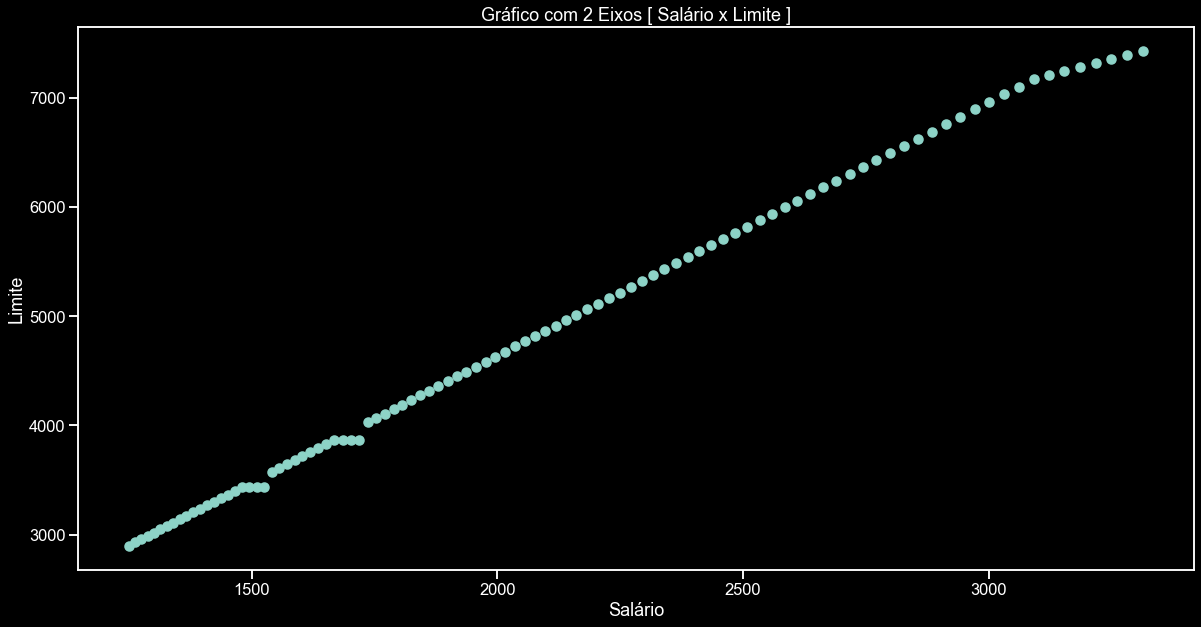

In [10]:
plt.figure(figsize=(20,10)) #criar uma figura com tal tamanho (horizontal e vertical)
plt.scatter(Eixo_x, Eixo_y)
plt.title('Gráfico com 2 Eixos [ Salário x Limite ]')
plt.xlabel('Salário')
plt.ylabel('Limite')

## Análise Exploratória dos Dados - Parte 2

Observando o conjunto de dados

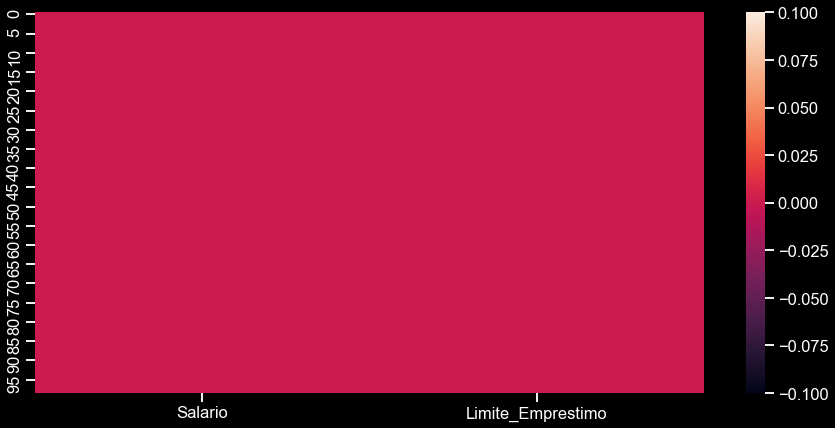

In [11]:
plt.figure(figsize=(15,7)) #criar uma figura com tal tamanho (horizontal e vertical)
sns.heatmap(data.isnull()); # o ponto e vírgula exclui os textos "<matplotlib.axes._subplots.AxesSubplot at 0x1e4a8e9f278>"

Ou seja, não há nenhum valor nulo no nosso gráfico

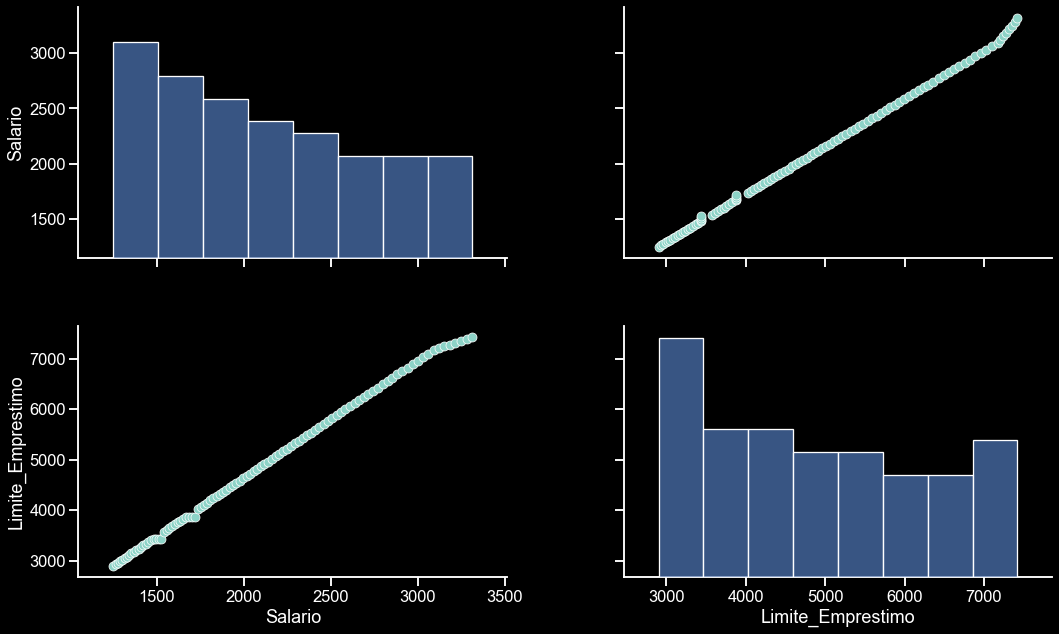

In [12]:
g = sns.pairplot(data)
g.fig.set_figwidth(20)  # horizontal
g.fig.set_figheight(10) # vertical

In [13]:
Correlação = np.corrcoef(Eixo_x, Eixo_y)
Correlação

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

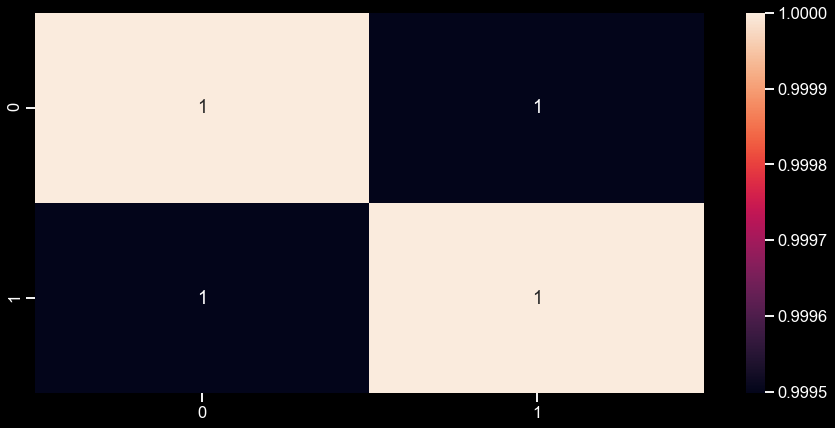

In [14]:
plt.figure( figsize=(15,7) ) #criar uma figura com tal tamanho (horizontal e vertical)
sns.heatmap( Correlação, annot=True ); # annot = True é para escrever o valor dentro do heatmap

## Separando os dados em Treino e Teste

In [15]:
Eixo_x = Eixo_x.reshape(-1,1) # converte os dados para o formato de matriz
Eixo_y = Eixo_y.reshape(-1,1) # converte os dados para o formato de matriz

In [16]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(Eixo_x, Eixo_y, test_size = 0.30, random_state = 10) # 20% dos dados ficaram para teste e 80% para treino
# A escolha depende muito do problema e pode variar também com a correlação das características

In [17]:
len(x_treino), len(x_teste)

(69, 30)

## Treinando o Modelo

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # chamada do modelo

reg.fit( x_treino, y_treino ) # aplicar os dados para treinar o modelo. O modelo vai aprender como o SALÁRIO afeta o LIMITE DE EMPRÉSTIMO

LinearRegression()

In [19]:
reg.score( x_treino, y_treino ) # O quanto o modelo se explica

0.9988118380727979

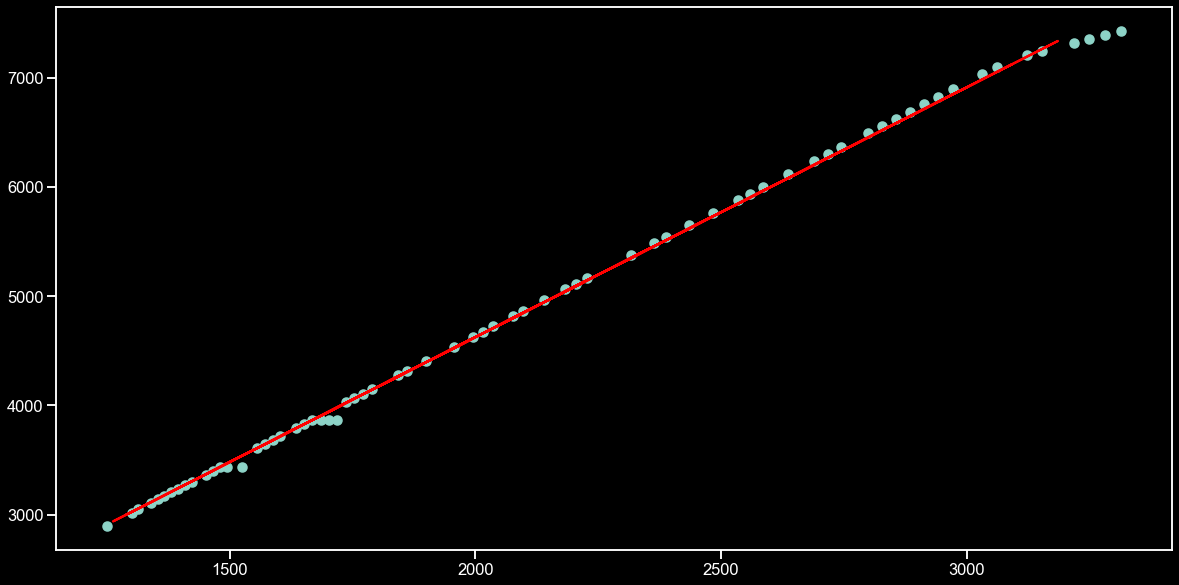

In [20]:
plt.figure( figsize=(20,10) )
plt.scatter( x_treino, y_treino )
plt.plot( x_teste, reg.predict(x_teste), color='red' ) # plotar a linha da regressão

## Avaliando o Desempenho do Modelo

In [21]:
previsões = reg.predict( x_teste )

from sklearn import metrics

# raiz quadradada do erro médio
print( 'RMSE', np.sqrt(metrics.mean_squared_error(y_teste, previsões)) )

RMSE 28.375004439923615


## Testando Novos Valores

Caso a pessoa tenha um novo Salário X, qual o Limite de Empréstimo Y que ela pode ter?

In [54]:
X = [[3000]]
Y = reg.predict(X)

print( 'Para alguém que recebe um Salário de R$ %f, seu Limite de Empréstimo será R$ %f' %(X[0][0], Y[0,0]) )

Para alguém que recebe um Salário de R$ 3000.000000, seu Limite de Empréstimo será R$ 6911.582280


## RMSE NA MÃO

In [40]:
previsões[2:5], previsões[1,0]

(array([[4436.75894034],
        [4182.58302436],
        [5564.61522672]]),
 3337.432773249441)

In [35]:
# RMSE na mão

MSE = 0
n = len(y_teste)
for i in range(n):
    diferença = previsões[i,0] - y_teste[i,0]
    MSE += diferença**2
RMSE = np.sqrt(MSE/n)
RMSE

28.37500443992361